# Credit Card Fraud Detection
![title]("creditfraud.jpg")

In [2]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn import under_sampling,over_sampling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve, confusion_matrix, plot_confusion_matrix

In [4]:
df=pd.read_csv('creditcard.csv/creditcard.csv')

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


Data Cleaning and Exploratory Data Analysis

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

In [9]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
df[df.duplicated(keep=False)]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
32,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
33,26.0,-0.529912,0.873892,1.347247,0.145457,0.414209,0.100223,0.711206,0.176066,-0.286717,...,0.046949,0.208105,-0.185548,0.001031,0.098816,-0.552904,-0.073288,0.023307,6.14,0
34,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
35,26.0,-0.535388,0.865268,1.351076,0.147575,0.433680,0.086983,0.693039,0.179742,-0.285642,...,0.049526,0.206537,-0.187108,0.000753,0.098117,-0.553471,-0.078306,0.025427,1.77,0
112,74.0,1.038370,0.127486,0.184456,1.109950,0.441699,0.945283,-0.036715,0.350995,0.118950,...,0.102520,0.605089,0.023092,-0.626463,0.479120,-0.166937,0.081247,0.001192,1.18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283485,171627.0,-1.457978,1.378203,0.811515,-0.603760,-0.711883,-0.471672,-0.282535,0.880654,0.052808,...,0.284205,0.949659,-0.216949,0.083250,0.044944,0.639933,0.219432,0.116772,11.93,0
284190,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284191,172233.0,-2.667936,3.160505,-3.355984,1.007845,-0.377397,-0.109730,-0.667233,2.309700,-1.639306,...,0.391483,0.266536,-0.079853,-0.096395,0.086719,-0.451128,-1.183743,-0.222200,55.66,0
284192,172233.0,-2.691642,3.123168,-3.339407,1.017018,-0.293095,-0.167054,-0.745886,2.325616,-1.634651,...,0.402639,0.259746,-0.086606,-0.097597,0.083693,-0.453584,-1.205466,-0.213020,36.74,0


In [11]:
df = df.drop_duplicates(keep='first')

In [12]:
class_proportion = df['Class'].value_counts()
class_proportion

0    283253
1       473
Name: Class, dtype: int64

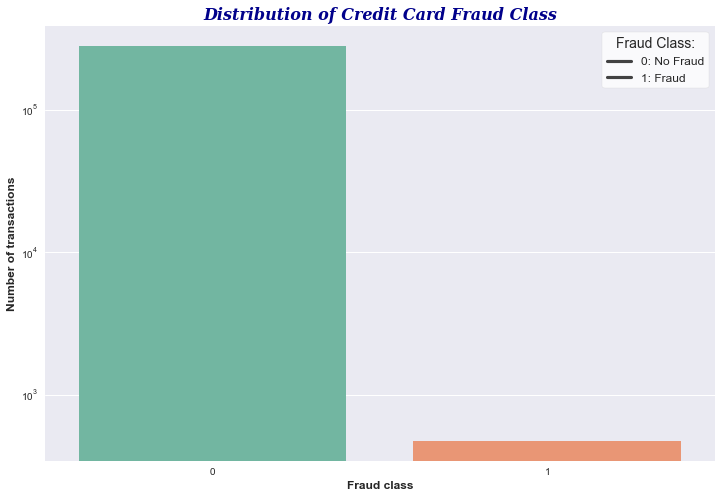

In [13]:
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}
font3 = {'weight': 'normal', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.barplot(class_proportion.index, class_proportion.values, palette='Set2')
ax.set_title('Distribution of Credit Card Fraud Class', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
ax.set_ylabel('Number of transactions', fontdict=font2)
ax.set_yscale('log')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels=['0: No Fraud', '1: Fraud'], prop= font3, 
          title ='Fraud Class:', title_fontsize=14,
          frameon=True, facecolor='white')
plt.show()

# Feature Engineering and Model Preparation

In [14]:
df['Class'].value_counts(normalize=True)

0    0.998333
1    0.001667
Name: Class, dtype: float64

In [15]:
X = df.drop(columns=(['Time', 'Class']))
y = df['Class']

In [16]:
sm = SMOTE(sampling_strategy='auto', random_state=3, k_neighbors=5)
X_oversampled , y_oversampled = sm.fit_resample(X, y)

In [17]:
unique_original, counts_original = np.unique(y, return_counts=True)
unique_oversampled, counts_oversampled = np.unique(y_oversampled, return_counts=True)

print('Original fraud class distribution:', dict(zip(unique_original, counts_original)))
print('New transformed fraud class distribution:',dict(zip(unique_oversampled, counts_oversampled)))

Original fraud class distribution: {0: 283253, 1: 473}
New transformed fraud class distribution: {0: 283253, 1: 283253}


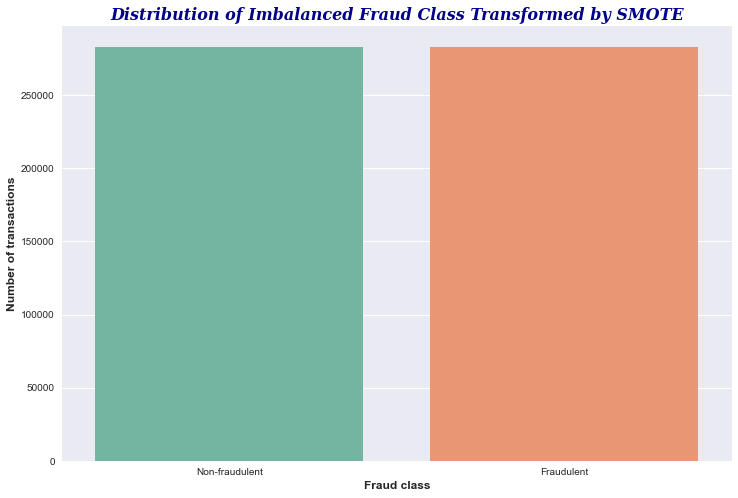

In [18]:
plt.style.use('seaborn')
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(y_oversampled, palette='Set2', ax=ax)
ax.set_title('Distribution of Imbalanced Fraud Class Transformed by SMOTE', fontdict=font1)
ax.set_xlabel('Fraud class', fontdict=font2)
ax.set_xticklabels(['Non-fraudulent', 'Fraudulent'])
ax.set_ylabel('Number of transactions', fontdict=font2)
plt.show()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

# Random Forest

In [20]:
rfc = RandomForestClassifier(n_estimators=64)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=64)

In [21]:
training_rfc_accuracy = rfc.score(X_train, y_train)
testing_rfc_accuracy = rfc.score(X_test, y_test)

print("Training RFC Accuracy:", training_rfc_accuracy)
print("Testing RFC Accuracy:", testing_rfc_accuracy )

Training RFC Accuracy: 1.0
Testing RFC Accuracy: 0.9998658447894823


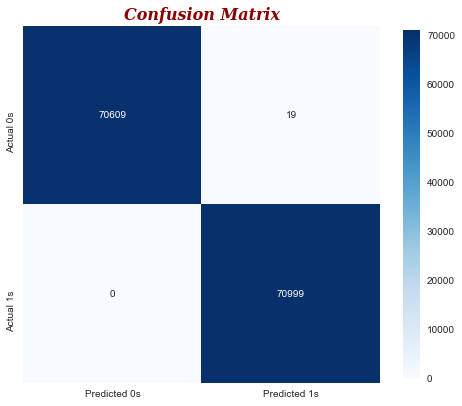

In [22]:
fig, ax = plt.subplots(figsize=(8, 8))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, rfc.predict(X_test)), 
            cmap='Blues', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('Confusion Matrix', fontdict=font1)
plt.show()

In [23]:
TN, FP, FN, TP = confusion_matrix(y_test, rfc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 70609
False Positives: 19
False Negatives: 0
True Positives: 70999

Sensitivity: 1.0
Specificity: 0.9997309848785184
Precision: 0.9997324621926835


In [24]:
testing_probabilities= rfc.predict_proba(X_test)
testing_probabilities

array([[0.      , 1.      ],
       [0.      , 1.      ],
       [0.      , 1.      ],
       ...,
       [0.984375, 0.015625],
       [0.984375, 0.015625],
       [0.      , 1.      ]])

In [25]:
testing_probabilities_df = pd.DataFrame(testing_probabilities, columns=['1 - 𝑝(X_test)', '𝑝(X_test)'])
testing_probabilities_df.head()

,1 - 𝑝(X_test),𝑝(X_test)
0,0.0,1.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,0.0,1.0


In [26]:
rfc.predict(X_test)

array([1, 1, 1, ..., 0, 0, 1], dtype=int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [28]:
params = {'penalty': ['l1', 'l2'],
          'C': [0.0001, 0.001, 0.01, 10, 50, 100],
          'class_weight': [None, 'balanced']}

In [29]:
lgr = LogisticRegression(solver='liblinear')
gs = GridSearchCV(lgr, params, cv = 5)
gs.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': [0.0001, 0.001, 0.01, 10, 50, 100],
                         'class_weight': [None, 'balanced'],
                         'penalty': ['l1', 'l2']})

In [30]:
training_lgr_accuracy = gs.score(X_train, y_train)
testing_lgr_accuracy = gs.score(X_test, y_test)

print("Training LGR Accuracy:", training_lgr_accuracy)
print("Testing LGR Accuracy:", testing_lgr_accuracy)

Training LGR Accuracy: 0.9586352820450058
Testing LGR Accuracy: 0.9577128654846887


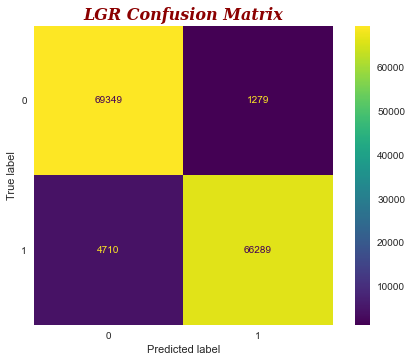

In [31]:
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkRed'}

plot_confusion_matrix(gs, X_test, y_test, values_format='d')
plt.title('LGR Confusion Matrix', fontdict=font1)
plt.grid(False)
plt.show()

In [32]:
TN, FP, FN, TP = confusion_matrix(y_test, gs.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69349
False Positives: 1279
False Negatives: 4710
True Positives: 66289

Sensitivity: 0.9336610374794011
Specificity: 0.9818910347171094
Precision: 0.9810709211461046


In [33]:
training_lgr_AUC = roc_auc_score(y_train, gs.predict_proba(X_train)[:, 1]) 
testing_lgr_AUC = roc_auc_score(y_test, gs.predict_proba(X_test)[:, 1])

print("Training LGR AUC:", training_lgr_AUC)
print("Testing LGR AUC:", testing_lgr_AUC)

Training LGR AUC: 0.9918784780430148
Testing LGR AUC: 0.9915944616653727


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, random_state=3)

In [35]:
gbc = GradientBoostingClassifier(n_estimators=64)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=64)

In [36]:
training_gbc_accuracy = gbc.score(X_train, y_train)
testing_gbc_accuracy = gbc.score(X_test, y_test)

print("Training GBC Accuracy:", training_gbc_accuracy)
print("Testing GBC Accuracy:", testing_gbc_accuracy)

Training GBC Accuracy: 0.9741291049922448
Testing GBC Accuracy: 0.9733737211124998


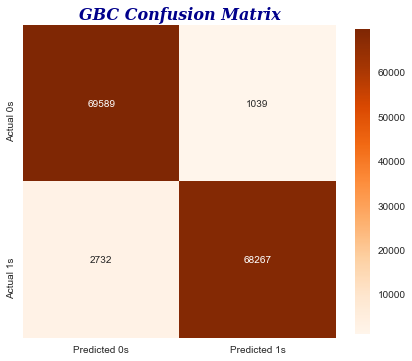

In [37]:
fig, ax = plt.subplots(figsize=(7, 7))
font1 = {'family': 'serif', 
        'fontstyle': 'italic',
        'fontsize': 16,
        'fontweight': 'bold',
        'color': 'DarkBlue'}
font2 = {'weight': 'bold', 'size': 12}

sns.heatmap(confusion_matrix(y_test, gbc.predict(X_test)), 
            cmap='Oranges', 
            square=True,
            annot=True,
            fmt='d',
            cbar_kws={'shrink': 0.8},
            xticklabels=['Predicted 0s', 'Predicted 1s'],
            yticklabels=['Actual 0s', 'Actual 1s'])
ax.set_title('GBC Confusion Matrix', fontdict=font1)
plt.show()

In [38]:
TN, FP, FN, TP = confusion_matrix(y_test, gbc.predict(X_test)).flatten()
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)
print("True Positives:", TP)

sensitivity = TP/(TP + FN)
specificity = TN/(TN + FP)
precision = TP/(TP + FP)
print("\nSensitivity:", sensitivity)
print("Specificity:", specificity)
print("Precision:", precision)

True Negatives: 69589
False Positives: 1039
False Negatives: 2732
True Positives: 68267

Sensitivity: 0.961520584796969
Specificity: 0.9852891204621397
Precision: 0.9850085129714599
